In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from PIL import Image
import base64
import os

In [2]:
def padding_img_3D(src_img):
    height, width, d = src_img.shape
    
    padded_img_3D = np.zeros((height + 80, width + 80, d), dtype='uint8')
    padded_img_3D[40:height + 40, 40:width + 40, :] = src_img
    
    return padded_img_3D

In [3]:
def padding_img_2D(labellds_img):
    height, width = labellds_img.shape
    
    padded_img_2D = np.zeros((height + 80, width + 80), dtype='uint8')
    padded_img_2D[40:height + 40, 40:width + 40] = labellds_img
    
    return padded_img_2D

In [4]:
def crop_img_by_indx(src_img, indx):
    padded_img_3D = padding_img_3D(src_img)

    return padded_img_3D[indx[0]:indx[0]+81, indx[1]:indx[1]+81, :]

In [5]:
def crop_img_labeled_by_indx(img_labeled, indx):
    padded_img_2D = padding_img_2D(img_labeled)
    
    return padded_img_2D[indx[0]:indx[0]+81, indx[1]:indx[1]+81]

In [6]:
def get_tfl(img, src_img):
    positions = np.argwhere(img == 19)
    
    if len(positions) == 0:
        return None, 0
    
    i = np.random.randint(len(positions))
    indx = positions[i]
    
    data = crop_img_by_indx(src_img, indx)
    label = 1
    
    return data, label

In [7]:
def get_no_tfl(img, src_img):
    positions = np.argwhere(img != 19)
    
    num_attempts_get_indx = min(10, len(positions))
    
    while num_attempts_get_indx > 0:
        i = np.random.randint(len(positions))
        indx = positions[i]
            
        data_labeled = crop_img_labeled_by_indx(img, indx)
        
        # if there is tfl in the crop image
        if len(np.argwhere(data_labeled == 19)) != 0:
            np.delete(positions, i)
            num_attempts_get_indx -= 1
            
            if num_attempts_get_indx == 0:
                return None, 1
            
        else:
            num_attempts_get_indx = 0
            
    data = crop_img_by_indx(src_img, indx)
    label = 0
    
    return data, label

In [8]:
def write_data(data_list, labels_list, dataset_type):
    np.array(data_list).tofile(f".\data_dir\\{dataset_type}\\data.bin")
    np.array(labels_list, dtype = 'uint8').tofile(f".\data_dir\\{dataset_type}\\labels.bin")

In [9]:
def read_data(dataset_type):
    data_from_file = np.fromfile(f".\data_dir\\{dataset_type}\\data.bin", dtype = 'uint8')
    labels_from_file = np.fromfile(f".\data_dir\\{dataset_type}\\labels.bin", dtype = 'uint8')
    
    return data_from_file, labels_from_file

In [10]:
def uploading_images(dataset_type):
    for root, dirs, images in os.walk(f".\cityscapes\gtFine\\{dataset_type}"):
        for image in images:
            if image.endswith("_gtFine_labelIds.png"):
                curr_path = f"{root}\\{image}"
            
                yield curr_path

In [11]:
def build_dataset(dataset_type):
    data_list = []
    labels_list = []
    
    for image_path in uploading_images(dataset_type):

        img_labeled =  np.asarray(Image.open(image_path))
        img_name = image_path[20 + len(dataset_type):-20]  # aachen\aachen_000000_000019
        src_img = np.asarray(Image.open(f".\cityscapes\leftImg8bit\\{dataset_type}\\{img_name}_leftImg8bit.png"))
        
        tfl_data, tfl_label = get_tfl(img_labeled, src_img)
        no_tfl_data, no_tfl_label = get_no_tfl(img_labeled, src_img)
        
        if tfl_data is not None and no_tfl_data is not None:
            data_list += [tfl_data, no_tfl_data]
            labels_list += [tfl_label, no_tfl_label]
    
    write_data(data_list, labels_list, dataset_type)

In [12]:
build_dataset("train")

[1 0 1 ... 0 1 0]


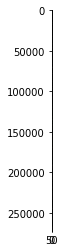

In [13]:
data_from_file, labels_from_file = read_data("train")

plt.imshow(data_from_file.reshape(81*len(labels_from_file), 81, 3), interpolation='nearest')
print(labels_from_file)

In [14]:
build_dataset("val")

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 

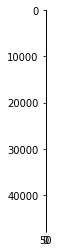

In [15]:
data_from_file, labels_from_file = read_data("val")

plt.imshow(data_from_file.reshape(81*len(labels_from_file), 81, 3), interpolation='nearest')
print(labels_from_file)

val :  (582, 81, 81, 3) 0/1 split 50.0 %
train :  (3316, 81, 81, 3) 0/1 split 50.0 %


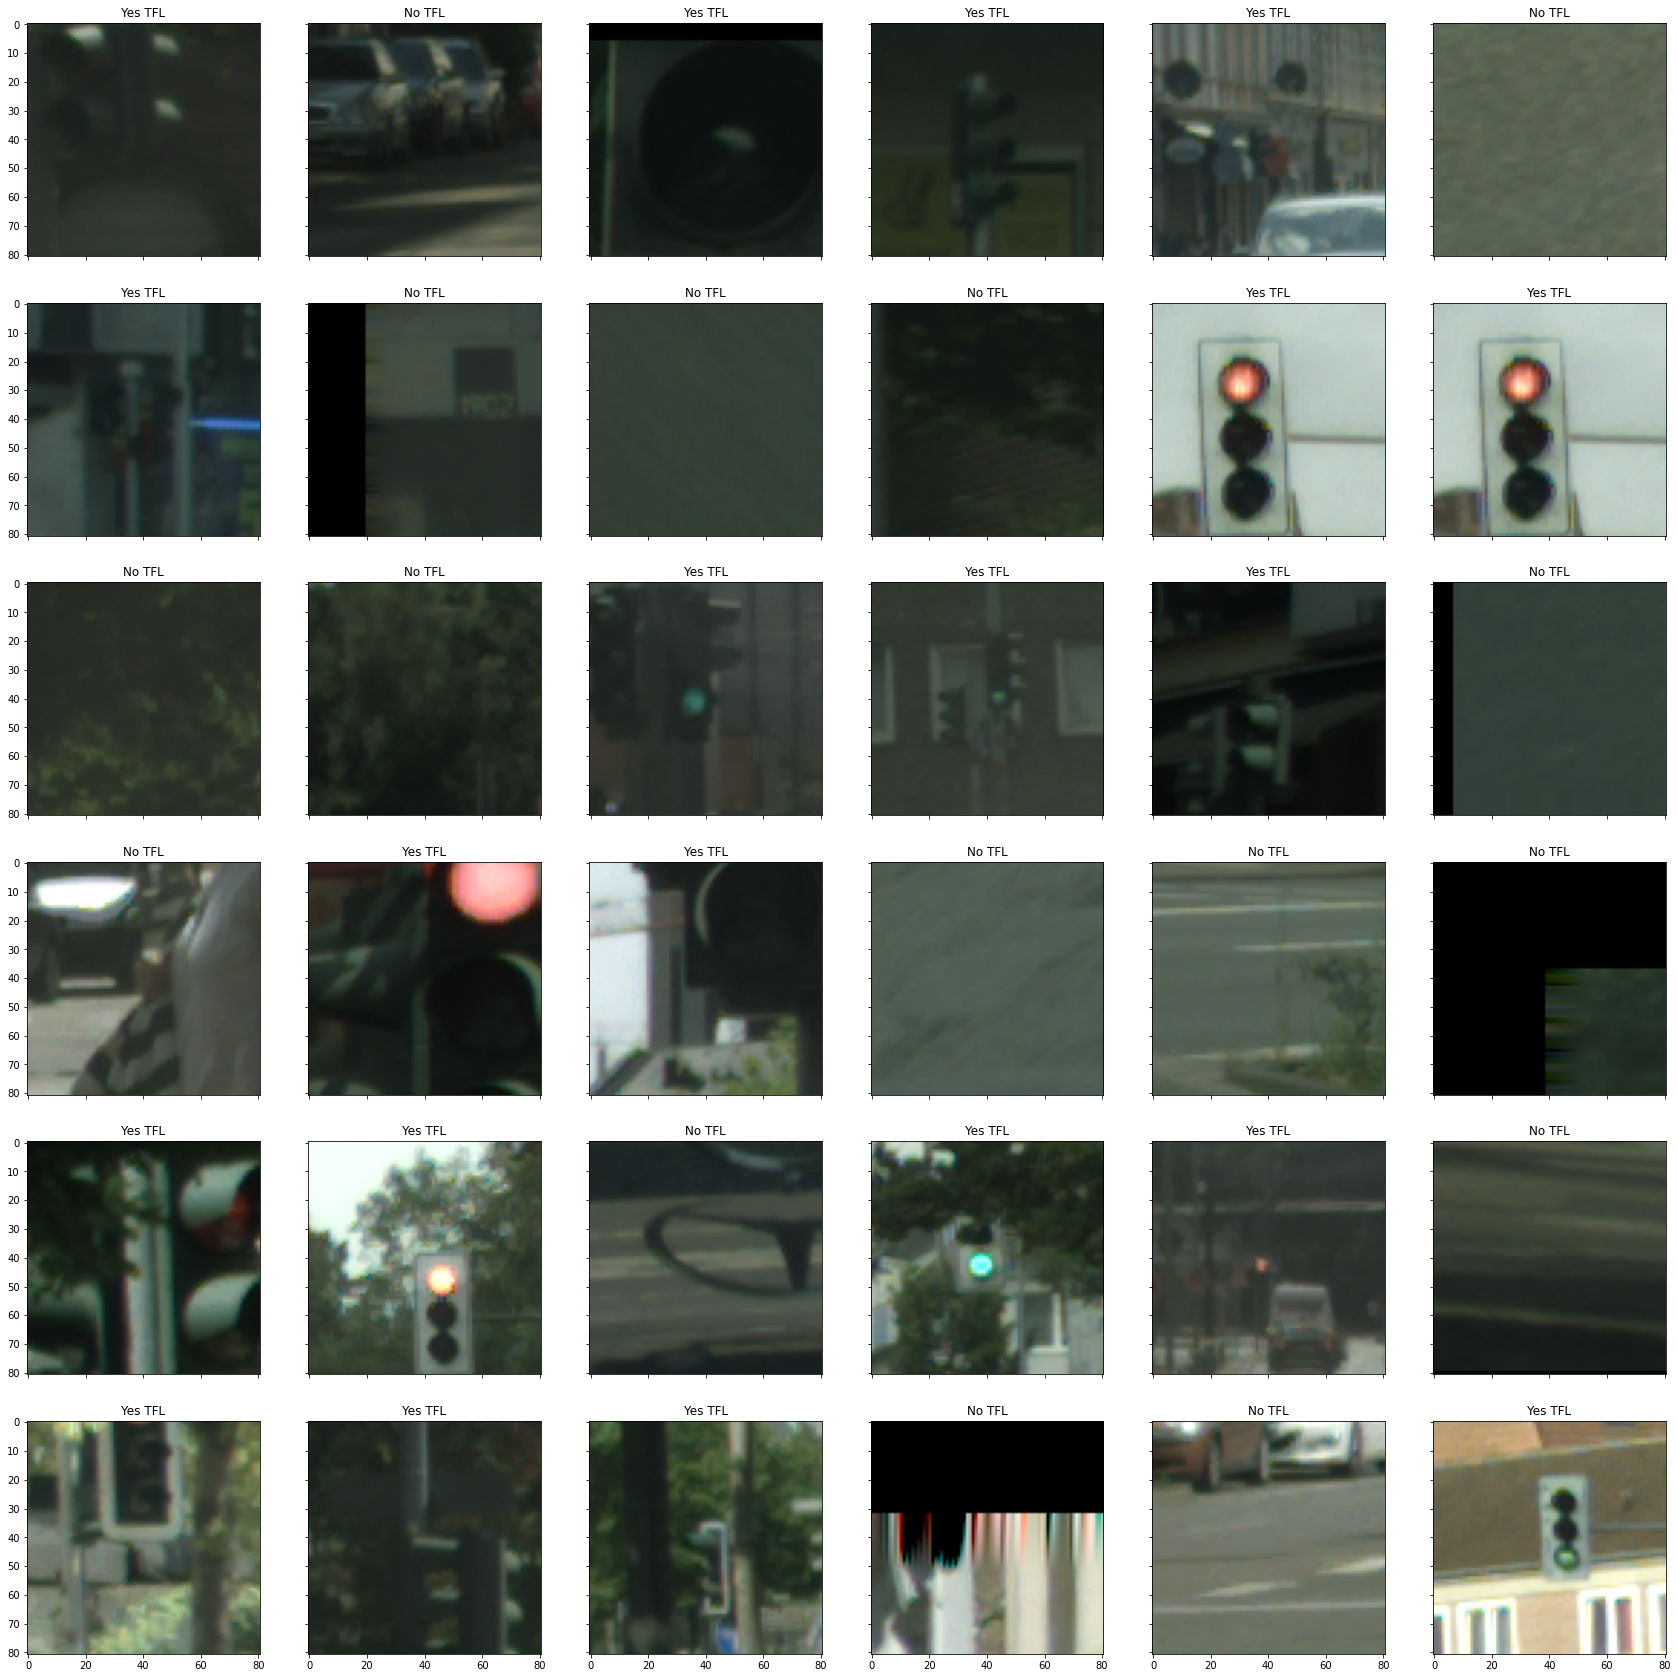

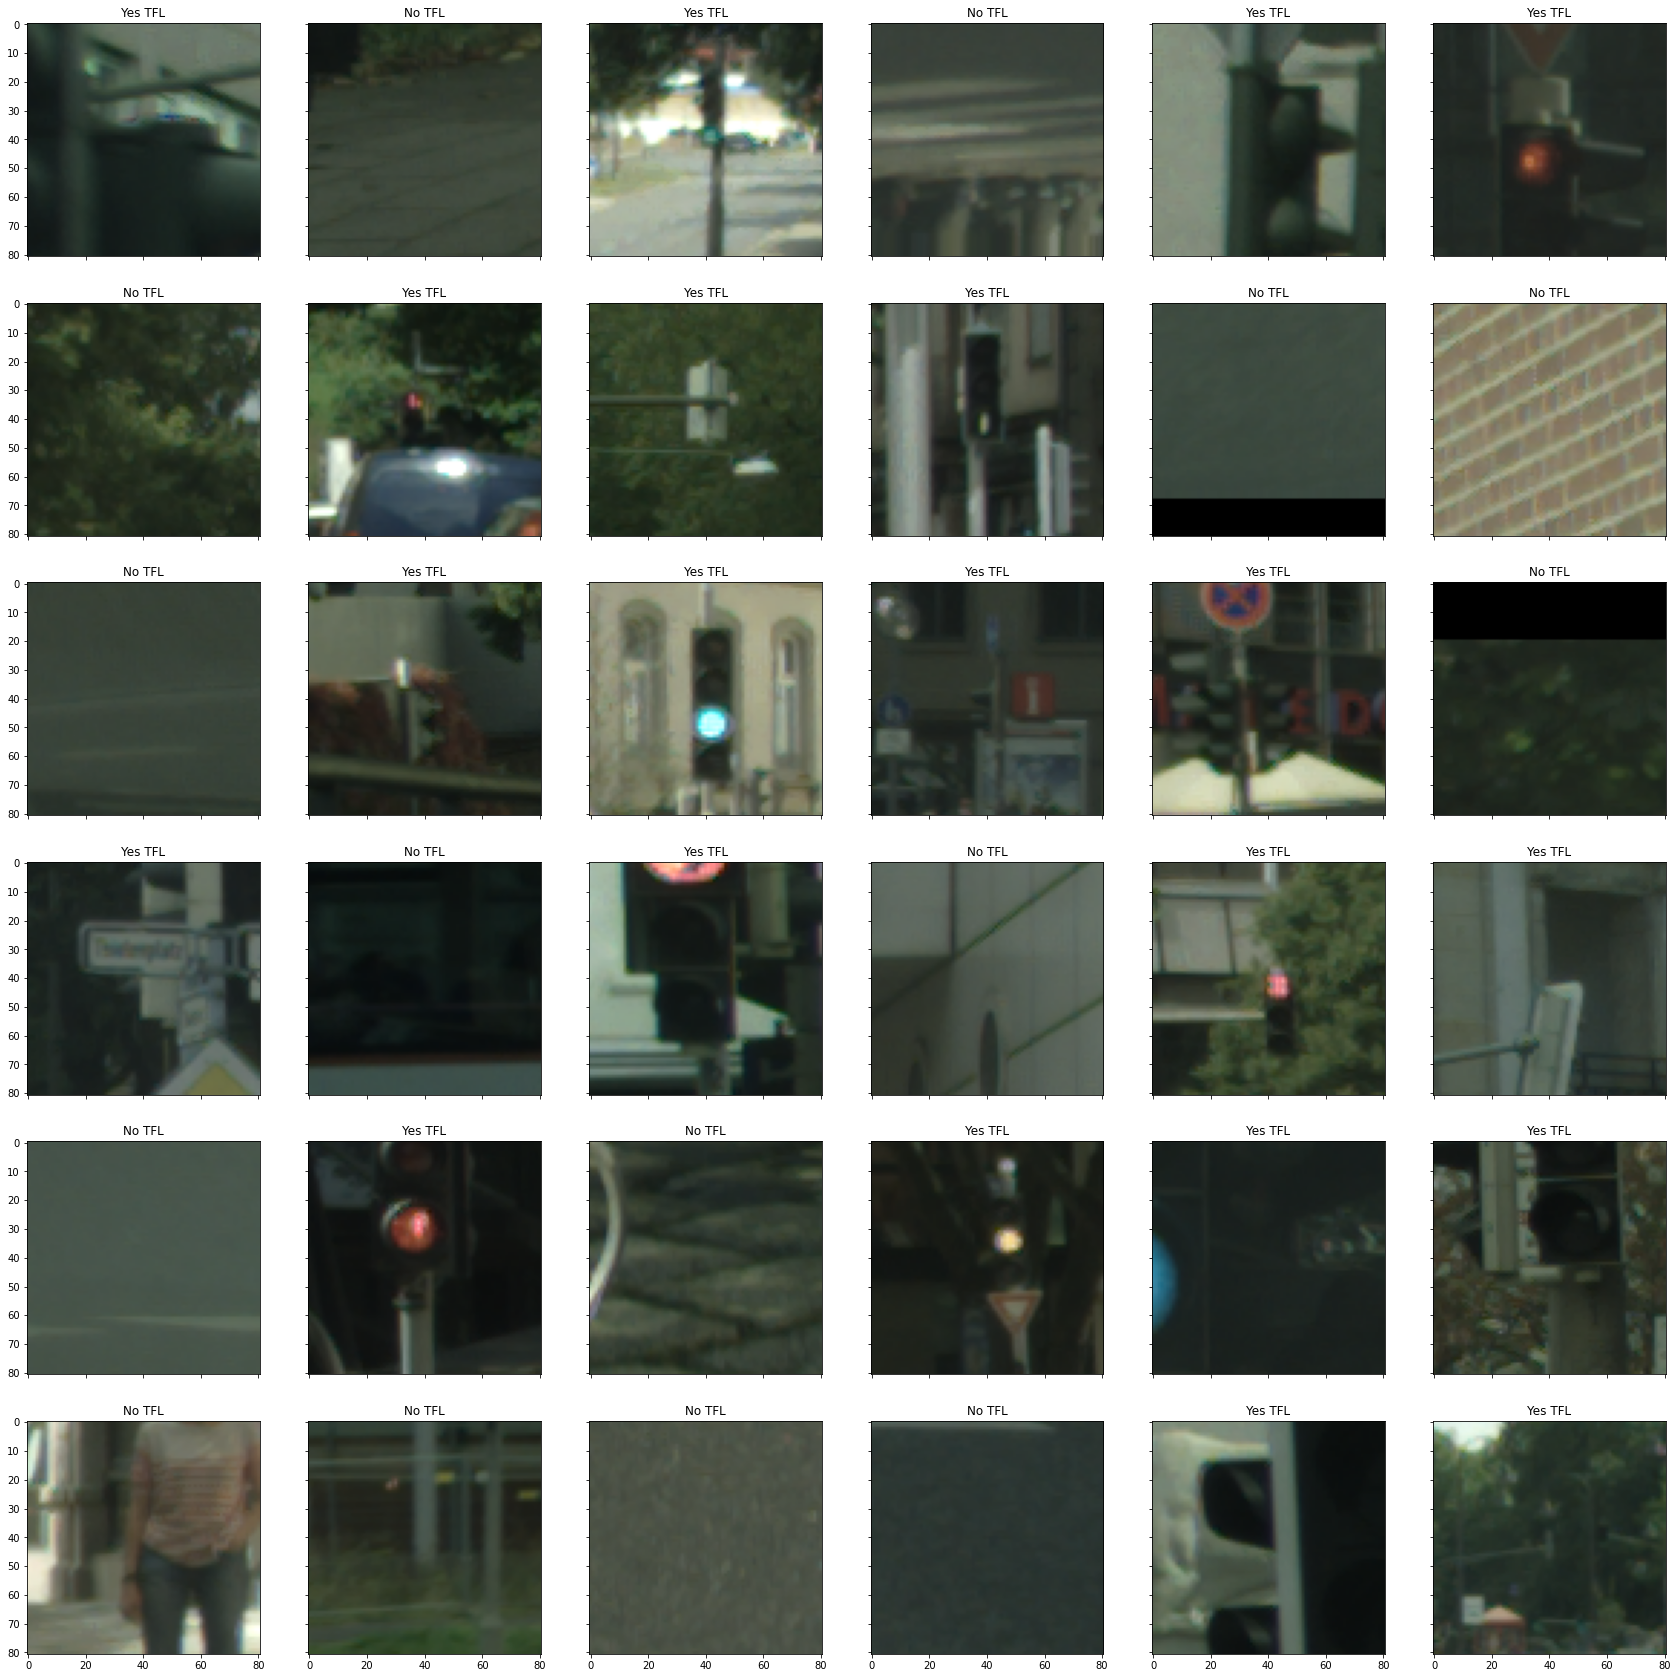

In [16]:
def load_tfl_data(data_dir, crop_shape=(81,81)):
    images = np.memmap(join(data_dir,'data.bin'),mode='r',dtype=np.uint8).reshape([-1]+list(crop_shape) +[3])
    labels = np.memmap(join(data_dir,'labels.bin'),mode='r',dtype=np.uint8)
    return {'images':images,'labels':labels}

def viz_my_data(images,labels, predictions=None, num=(5,5), labels2name= {0:'No TFL',1:'Yes TFL'}):
    assert images.shape[0] == labels.shape[0]
    assert predictions is None or predictions.shape[0] == images.shape[0]
    h = 5
    n = num[0]*num[1]
    ax = plt.subplots(num[0],num[1],figsize=(h*num[0],h*num[1]),gridspec_kw={'wspace':0.05},squeeze=False,sharex=True,sharey=True)[1]#.flatten()
    idxs = np.random.randint(0,images.shape[0],n)
    
    for i,idx in enumerate(idxs):
        ax.flatten()[i].imshow(images[idx])
        title = labels2name[labels[idx]]
        if predictions is not None : title += ' Prediction: {:.2f}'.format(predictions[idx])
        ax.flatten()[i].set_title(title)
   

# root = './'  #this is the root for your val and train datasets
data_dir = './data_dir/'
datasets = {
    'val':load_tfl_data(join(data_dir,'val')),
    'train': load_tfl_data(join(data_dir,'train')),
    }

for k,v in datasets.items():
    print ('{} :  {} 0/1 split {:.1f} %'.format(k,v['images'].shape, np.mean(v['labels']==1)*100))

viz_my_data(num=(6,6),**datasets['val'])
viz_my_data(num=(6,6),**datasets['train'])